In [140]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt

In [113]:
pd.set_option("display.max_colwidth", -1)

In [114]:
data = pd.read_csv('winemag-data_first150k.csv', delimiter=",", encoding="utf-8")
data = data.iloc[:,1:]

In [115]:
data.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [116]:
data.drop(["region_1", "region_2"], axis=1, inplace=True)

In [117]:
data.isnull().sum()

country        5    
description    0    
designation    45735
points         0    
price          13695
province       5    
variety        0    
winery         0    
dtype: int64

In [118]:
set(data.country)

{'Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Morocco',
 'New Zealand',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Switzerland',
 'Tunisia',
 'Turkey',
 'US',
 'US-France',
 'Ukraine',
 'Uruguay',
 nan}

In [119]:
data.isnull().sum()

country        5    
description    0    
designation    45735
points         0    
price          13695
province       5    
variety        0    
winery         0    
dtype: int64

In [120]:
from collections import Counter

In [121]:
# Country
data.country[data.winery=='Chilcas']="Chile"
data.country[data.winery=="Tsililis"] = "Greece"
data.drop([1440], axis=0, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
data.loc[(data.country=="Greece") & (data.winery=="Tsililis") & data.province.isnull(),'province'] = "Greece"
data.loc[(data.country=="Chile") & (data.winery=="Chilcas") & (data.variety=="Pinot Noir"), "province"] = "Maule Valley"

In [123]:
data.loc[(data.country=="Italy") & (data.winery=="Abbadia Ardenga") & (data.variety=="Sangiovese"), "price"] = 65.0
data.loc[(data.country=="France") & (data.winery=="Domaine Vacheron") & (data.variety=="Sauvignon Blanc") & (data.designation=="Les Romains"), "price"] = 46.666666666666664
data.loc[(data.country=="France") & (data.winery=="Domaine Vacheron") & (data.variety=="Sauvignon Blanc") & (data.price.isnull()), "price"] = 39.428571428571423
data.loc[(data.country=="France") & (data.winery=="Domaine Vacheron") & (data.price.isnull()), "price"] = 41.18796992481203
data.loc[(data.country=="France") & (data.province=="Bordeaux") & (data.winery=="Les Hauts de Tousquiron"), "price"] = 28.0
data.loc[(data.country=="France") & (data.province=="Bordeaux") & (data.winery=="Château Ferran"), "price"] = 42.574539992489676
data.loc[(data.country=="France") & (data.province=="Bordeaux") & (data.winery=="Château de Portets") & (data.price.isnull()), "price"] = 22.0
data.loc[(data.country=="France") & (data.province=="Bordeaux") & (data.winery=="Château Lafargue"), "price"] = 42.566819714818948
data.loc[(data.country=="Italy") & (data.price.isnull()), "price"] = 37.549374500931592
data.loc[(data.country=="US") & (data.price.isnull()), "price"] = 33.653808397302818
data.loc[(data.country=="Spain") & (data.price.isnull()), "price"] = 27.048529411764704
data.loc[(data.country=="France") & (data.price.isnull()), "price"] = 45.609149427629319
data.loc[(data.country=="Austria") & (data.price.isnull()), "price"] = 31.192106322996377
data.loc[(data.country=="Portugal") & (data.price.isnull()), "price"] = 26.332614942528735
data.loc[(data.country=="New Zealand") & (data.price.isnull()), "price"] = 24.173289902280132
data.loc[(data.country=="Argentina") & (data.price.isnull()), "price"] = 20.794880973688922
data.loc[(data.country=="Germany") & (data.price.isnull()), "price"] = 39.011077971878997
data.loc[(data.country=="Australia") & (data.price.isnull()), "price"] = 31.258479771148345
data.loc[(data.country=="Chile") & (data.price.isnull()), "price"] = 19.342520367481367
data.loc[(data.country=="Israel") & (data.price.isnull()), "price"] = 31.304918032786887
data.loc[(data.country=="South Africa") & (data.price.isnull()), "price"] = 21.130531962449709
data.loc[(data.country=="Slovenia") & (data.price.isnull()), "price"] = 28.061728395061728
data.loc[(data.country=="Turkey") & (data.price.isnull()), "price"] = 25.800000000000001
data.loc[(data.country=="Greece") & (data.price.isnull()), "price"] = 21.742268041237114
data.loc[(data.country=="England") & (data.price.isnull()), "price"] = 47.5
data.loc[(data.country=="Uruguay") & (data.price.isnull()), "price"] = 25.847058823529412
data.loc[(data.country=="Croatia") & (data.price.isnull()), "price"] = 23.108433734939759
data.loc[(data.country=="Hungary") & (data.price.isnull()), "price"] = 44.204347826086959
data.loc[(data.country=="Canada") & (data.price.isnull()), "price"] = 34.628865979381445
data.loc[(data.price.isnull()), "price"] = 33.703910449195497


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [125]:
new_data = data
lb_country = LabelEncoder()
lb_country.fit(new_data.country)
new_data.country = lb_country.transform(new_data.country)
lb_province = LabelEncoder()
lb_province.fit(new_data.province)
new_data.province = lb_province.transform(new_data.province)
lb_variety = LabelEncoder()
lb_variety.fit(new_data.variety)
new_data.variety = lb_variety.transform(new_data.variety)
lb_winery = LabelEncoder()
lb_winery.fit(new_data.winery)
new_data.winery = lb_winery.transform(new_data.winery)


In [126]:
train = new_data[new_data.designation.notnull()]
test = new_data[new_data.designation.isnull()]
lb_designation = LabelEncoder()
train.designation = lb_designation.fit_transform(train.designation)
y_train = train.designation
train.drop(['description','designation'], axis=1, inplace=True)
test.drop(['description','designation'], axis=1, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [127]:
# clf = DecisionTreeClassifier(max_depth=7, max_features="auto", min_samples_split=5, random_state=0)
clf = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf.fit(train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [128]:
pred = clf.predict(test)

In [129]:
predictions = lb_designation.inverse_transform(pred)

In [130]:
test = pd.concat([test,pd.DataFrame(predictions)], axis=1, ignore_index=True, join="inner")
test.columns = ['country', 'points', 'price', 'province', 'variety', 'winery', 'designation']
train = pd.concat([train,pd.DataFrame(y_train)], axis=1, ignore_index=True, join="inner")
train.columns = ['country', 'points', 'price', 'province', 'variety', 'winery', 'designation']

In [131]:
train.country = lb_country.inverse_transform(train.country)
test.country = lb_country.inverse_transform(test.country)
train.province = lb_province.inverse_transform(train.province)
test.province = lb_province.inverse_transform(test.province)
train.variety = lb_variety.inverse_transform(train.variety)
test.variety = lb_variety.inverse_transform(test.variety)
train.winery = lb_winery.inverse_transform(train.winery)
test.winery = lb_winery.inverse_transform(test.winery)
train.designation = lb_designation.inverse_transform(y_train)

In [132]:
import math
import operator
def euclidean(x,y,l):
    d = 0
    for i in range(l):
        d += pow((x[i]-y[i]),2)
    return math.sqrt(d)

def neighbours(train, test, k):
    dist = []
    length = len(test)-1
    for i in range(len(train)):
        dist.append((train[i], euclidean(test,train[i],length)))
    dist.sort(key=operator.itemgetter(1)) 
    neighbours = []
    for x in range(k):
        neighbours.append(dist[x][0])
    return neighbours

# def response(neighbours):
#     classVotes = {}
#     for x in range(len(neighbors)):
#         response = neighbors[x][-1]
#         if response in classVotes:
#             classVotes[response] += 1
#         else:
#             classVotes[response] = 1
#     sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
#     return sortedVotes[]

In [133]:
final_data = pd.concat([train,test], axis=0)

In [136]:
lb_country = LabelEncoder()
lb_country.fit(final_data.country)
final_data.country = lb_country.transform(final_data.country)
lb_province = LabelEncoder()
lb_province.fit(final_data.province)
final_data.province = lb_province.transform(final_data.province)
lb_variety = LabelEncoder()
lb_variety.fit(final_data.variety)
final_data.variety = lb_variety.transform(final_data.variety)
lb_winery = LabelEncoder()
lb_winery.fit(final_data.winery)
final_data.winery = lb_winery.transform(final_data.winery)
lb_designation = LabelEncoder()
final_data.designation = lb_designation.fit_transform(final_data.designation)

In [138]:
from sklearn.cluster import DBSCAN

In [143]:
cluster = DBSCAN(n_jobs=-1)
cluster.fit(final_data.values)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=-1, p=None)

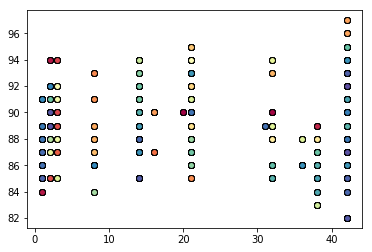

In [153]:
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = cluster.labels_

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        continue

    class_member_mask = (labels == k)  # generator comprehension 
    # X is your data matrix
    X = np.array(final_data.values)

    xy = X[class_member_mask & core_samples_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=2)
 
#        plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

array([  2.00000000e+00,   9.00000000e+01,   6.50000000e+01,
         3.36000000e+02,   4.72000000e+02,   4.06600000e+03,
         2.68390000e+04])